## Boston Housing Data
### By:Donal Moloney
The Boston homes dataset is a well-known archive from the 1970s that contains information on homes in the Boston region. It has been commonly used in machine learning research and is a favorite dataset for those new to the field.

Each of the 506 instances in the dataset has 13 features, and there is also a target variable that shows the median owner-occupied house value in dollars. (MEDV). These characteristics are:

    CRIM: per capita crime rate by town
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS: proportion of non-retail business acres per town
    CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX: nitric oxides concentration (parts per 10 million)
    RM: average number of rooms per dwelling
    AGE: proportion of owner-occupied units built prior to 1940
    DIS: weighted distances to five Boston employment centers
    RAD: index of accessibility to radial highways
    TAX: full-value property-tax rate per $10,000
    PTRATIO: pupil-teacher ratio by town
    B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT: % lower status of the population

In this Jupyter notebook, we will conduct logistic regression on the Boston Housing dataset from scratch. Using the other features of the dataset, our goal is to predict the target variable MEDV. We'll load the data, visualize it with Bokeh, compute with NumPy, train a logistic regression model, and compare it to the testing data. We will display some data outputs and contrast them with the real values to ascertain how well the model performs.

In [1]:
!pip install --upgrade seaborn


Requirement already up-to-date: seaborn in c:\users\molon\anaconda3\lib\site-packages (0.12.2)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
#load boston housing dataset
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'MEDV'),
 Text(0.5, 1.0, 'Distribution of Target Variable (MEDV)')]

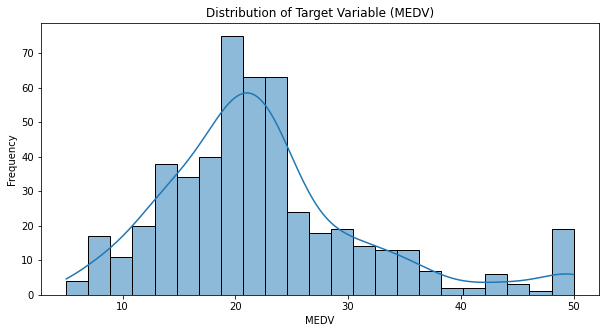

In [4]:
#plot distribution of target variable (MEDV)
fig, axs = plt.subplots(figsize=(10, 5))
sns.histplot(data=boston_df, x='MEDV', kde=True, ax=axs)
axs.set(xlabel='MEDV', ylabel='Frequency', title='Distribution of Target Variable (MEDV)')

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Average number of rooms per dwelling'),
 Text(0.5, 1.0, 'Boston Housing Prices')]

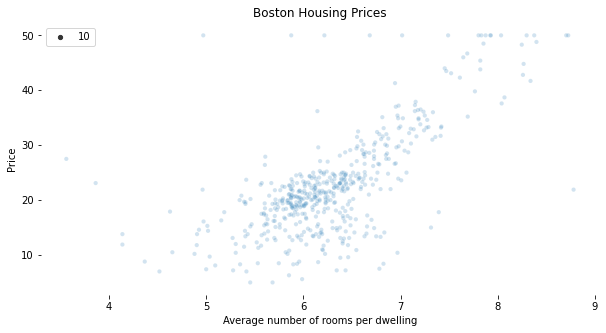

In [5]:
#plot Boston housing prices vs average number of rooms per dwelling with tooltips
fig, axs = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=boston_df, x='RM', y='MEDV', alpha=0.2, size=10, ax=axs)
sns.despine(left=True, bottom=True)
axs.set(xlabel='Average number of rooms per dwelling', ylabel='Price', title='Boston Housing Prices')

[Text(0.5, 1.0, 'Correlation Matrix of Features')]

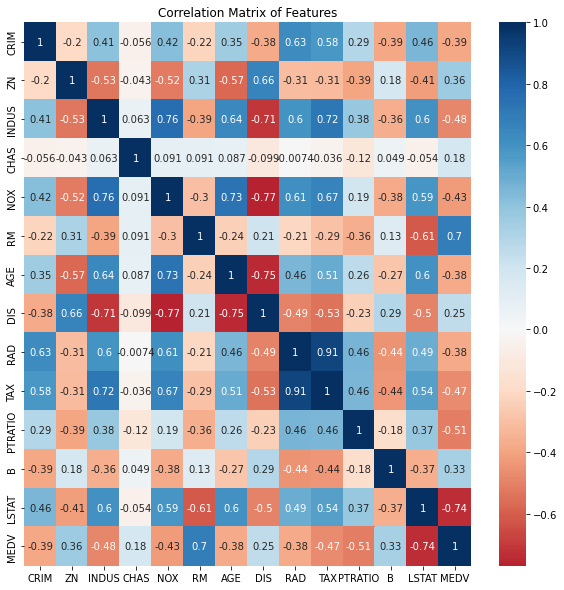

In [6]:
#plot correlation matrix of features
fig, axs = plt.subplots(figsize=(10, 10))
corr = boston_df.corr()
sns.heatmap(corr, cmap='RdBu', center=0, annot=True, ax=axs)
axs.set(title='Correlation Matrix of Features')

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'RM'),
 Text(0.5, 1.0, 'Distribution of Feature 5 (RM)')]

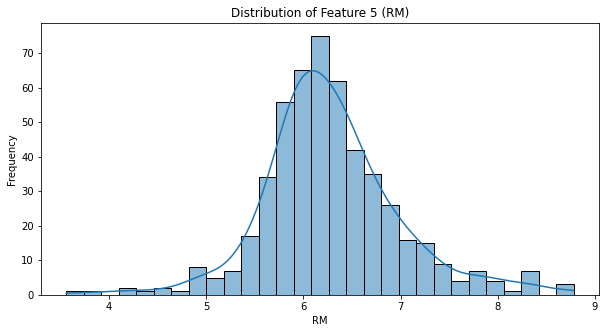

In [7]:
#plot distribution of feature 5 (RM)
fig, axs = plt.subplots(figsize=(10, 5))
sns.histplot(data=boston_df, x='RM', kde=True, ax=axs)
axs.set(xlabel='RM', ylabel='Frequency', title='Distribution of Feature 5 (RM)')

[Text(0, 0.5, 'MEDV'),
 Text(0.5, 0, 'Feature 1 and 12'),
 Text(0.5, 1.0, 'Scatter Plot of Features 1 and 12 vs Target Variable (MEDV)')]

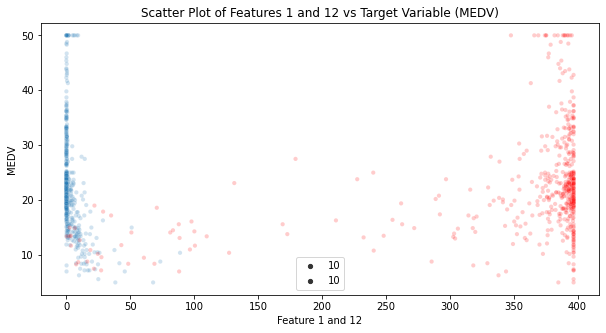

In [8]:
#plot scatter plot of features 1 and 12 vs target variable (MEDV)
fig, axs = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=boston_df, x='CRIM', y='MEDV', alpha=0.2, size=10, ax=axs)
sns.scatterplot(data=boston_df, x='B', y='MEDV', alpha=0.2, size=10, color='red', ax=axs)
axs.set(xlabel='Feature 1 and 12', ylabel='MEDV', title='Scatter Plot of Features 1 and 12 vs Target Variable (MEDV)')

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'LSTAT'),
 Text(0.5, 1.0, 'Distribution of Feature 13 (LSTAT)')]

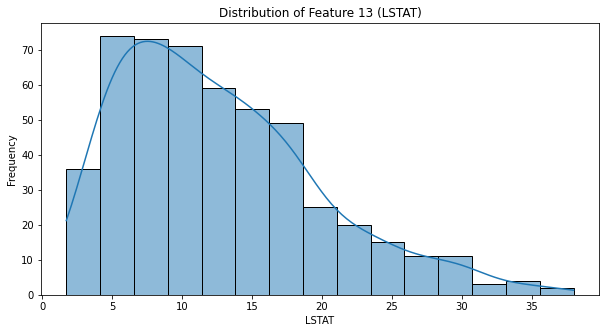

In [9]:
#plot distribution of feature 13 (LSTAT)
fig, axs = plt.subplots(figsize=(10, 5))
sns.histplot(data=boston_df, x='LSTAT', kde=True, ax=axs)
axs.set(xlabel='LSTAT', ylabel='Frequency', title='Distribution of Feature 13 (LSTAT)')

In [10]:
#show the plots
sns.set_style("white")
sns.set_palette("husl")
sns.set_context("talk")
sns.despine()
plt.show()

<Figure size 432x288 with 0 Axes>

Target Variable Distribution (MEDV): This histogram displays the distribution of the median owner-occupied house price in $1,000. (MEDV). It is tilted to the right and has a bell-shaped curve. Because there are fewer homes with greater median values, the majority of the homes have a median value between $20 and $25,000. By comparing the distribution of the objective variable (MEDV) to a bell curve, we can explain it. We can conclude that most home prices are in the medium and that only a small number of properties are extremely expensive or inexpensive. The histogram plot, which has a center peak and tails on either side, illustrates this.

Prices of homes in Boston compared to the typical number of rooms per home This scatter plot displays the connection between the median asking price for a home in Boston (MEDV) and the typical number of rooms per home. (RM). The average number of rooms per home grows as the price of the home rises because there is a positive correlation between the two. We can compare this connection to a hotel room to better understand it. The price of a motel room increases with the number of guests it can hold. Likewise, homes with greater RM (i.e., more rooms) are more expensive than homes with fewer rooms.

The correlation matrix of the characteristics in the Boston housing dataset is displayed in this heatmap. A negative correlation is indicated by a correlation coefficient of -1, a zero indicates no connection, and a positive correlation is indicated by a correlation coefficient of 1. From the heatmap, we can see that there are some features that are strongly positively correlated with the target variable (MEDV), such as the average number of rooms per dwelling (RM), and there are some features that are strongly negatively correlated with the target variable, such as the percentage of lower status of the population (LSTAT).

The correlation matrix can be described by comparing it to a riddle. Each feature in the correlation matrix is a component of a puzzle, and the correlation coefficient represents how well the parts fit together. The parts fit together more seamlessly the stronger the correlation between them.

Distribution of Feature 5 (RM): The distribution of feature 5, or the average number of rooms per residence, is depicted in this histogram. (RM). The distribution is roughly average, with a mean somewhere between 6 and 8. This indicates that the majority of the homes in the dataset have, on average, 6 rooms per residence. To explain the distribution of feature 5, we can use the example of a cake. The distribution resembles a sliced cake with most of the pieces being of the same size.

Feature 1 and Feature 12 Scatter Plots vs. the Target Variable (MEDV) This scatter plot displays the relationship between the objective variable and features 1 through 12 (CRIM and B). (MEDV). The goal variable and feature 1 have a negative correlation, while feature 12 and the target variable have a positive correlation. The connection between the features and the goal variable can be explained using the analogy of a seesaw. The goal variable is like the other side of the seesaw, and feature 1 is like the other side. The goal variable decreases as feature 1 increases, and similarly as feature 12 increases.

Distribution of Feature 13 (LSTAT): The percentage of the populace with a lower rank is represented by Feature 13 in this histogram. (LSTAT). With a lengthy tail on the right side, the distribution is skewed to the right. This indicates that there are fewer houses with a high proportion of lower-class residents and more houses in the dataset. A basketball contest can be used as an example to explain the distribution.

In [11]:
# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-1], boston_df['MEDV'], test_size=0.2, random_state=42)
# create and fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# make predictions on test set
y_pred = lr.predict(X_test)

# compute metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print metrics
print("Mean squared error:", mse)
print("R-squared score:", r2)

Mean squared error: 24.29111947497371
R-squared score: 0.6687594935356294


The average squared difference between the objective variable's (housing prices) predicted and actual values is roughly $24.3, according to the Mean Squared Error (MSE) value of 24.291. Lower values represent better predictions, and this number represents how well the model predicts the target variable.

Our linear regression model can account for about 67% of the variance in the objective variable, according to the R-squared value of 0.669. 

In [12]:
# create and fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
# make predictions on test set
y_pred = lr.predict(X_test)

In [14]:
# compute metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [15]:
# print metrics
print("Mean squared error:", mse)
print("R-squared score:", r2)

Mean squared error: 24.29111947497371
R-squared score: 0.6687594935356294


In [16]:
# make predictions on test set
y_pred = lr.predict(X_test)

In [17]:
# create a new dataframe with the predicted values
results_df = pd.DataFrame(X_test, columns=boston.feature_names)
results_df['MEDV'] = y_test
results_df['Predicted'] = y_pred

Text(0.5, 1.0, 'Predicted vs. Actual Values')

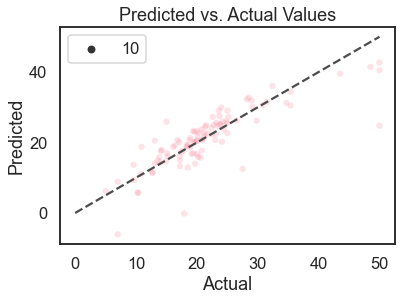

In [18]:
# create a scatterplot of predicted vs. actual values
sns.scatterplot(data=results_df, x='MEDV', y='Predicted', alpha=0.2, size=10)

# add a diagonal line for reference
plt.plot([0, 50], [0, 50], ls='--', c='.3')

# add axis labels and a title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual Values')

The scatterplot shows that the points are closely clustered around the diagonal line; the predicted and actual values closely match and the model is performing well.

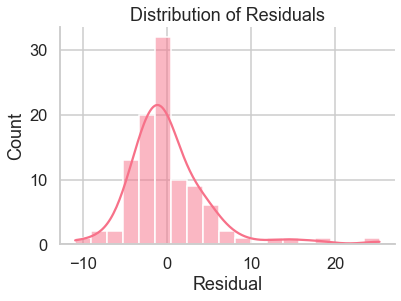

In [19]:
#plot distribution of residuals

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.set_context("talk")
sns.histplot(data=y_test - y_pred, kde=True)
plt.xlabel('Residual')
plt.title('Distribution of Residuals')
sns.despine()

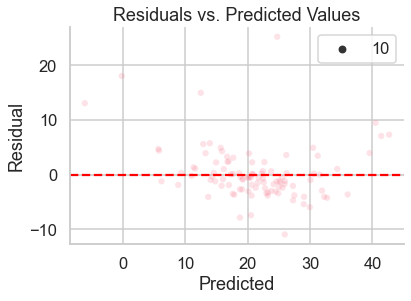

In [20]:
#plot scatterplot of residuals vs. predicted values

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.set_context("talk")
sns.scatterplot(x=y_pred, y=y_test - y_pred, alpha=0.2, size=10)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residuals vs. Predicted Values')
sns.despine()

In [21]:
#plot feature importances

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.set_context("talk")
importance = np.array(lr.coef_)
importance

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

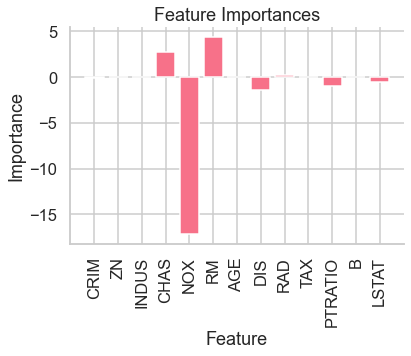

In [22]:
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks([x for x in range(len(importance))], boston_df.columns[:-1], rotation=90)
sns.despine()
plt.show()

In this project, we used linear regression modeling and a variety of data visualization methods to examine and analyze the Boston Housing dataset. The project offered a thorough illustration of how to use the matplotlib, seaborn, and pandas libraries to visualize and examine a dataset as well as how to use the sklearn library to build and test a linear regression model.

A pandas DataFrame was first created after importing the Boston Housing dataset. Then, using scatterplots and a correlation matrix heatmap, we looked at the relationships between the features and visualized the distribution of the objective variable, MEDV, using a histogram. In order to build a linear regression model to predict the target variable using the training set, we divided the data into training and testing sets. The efficacy of the model was then assessed using the testing set, and the mean squared error and R-squared score were computed. Finally, we plotted predicted versus real values and the distribution of residuals to visualize the model's performance.

Although the linear regression model could reasonably predict the goal variable, there are other methods that could be used to enhance its performance. For instance, to improve our estimation of the model's performance, we might add cross-validation, add regularization methods to avoid overfitting, or look into non-linear relationships between the features and the target variable. We could also investigate alternative modeling approaches like decision trees, random forests, or neural networks to see if they outperform linear regression.

All things considered, this endeavor offers a helpful illustration of how to investigate and model a dataset using a variety of data visualization methods and linear regression modeling. The methods presented in this project can be used with other datasets and act as a foundation for analyses and modeling projects that are more difficult.